In [231]:
from config import gkey
from config import weatherkey
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
from matplotlib import pyplot as plt
from scipy import stats
import os

In [ ]:
# # Build Cities Table 
# # define empty lists
# citylist = []
# latlist = []
# longlist = []
# countrycodelist = []
# loopcount = 0

# # define length of script
# MaxCities = 5


# # create dataframe 
# City_df = pd.DataFrame()
# header_list = ['Lattitude','Longitude']
# City_df = City_df.reindex(columns = header_list)      

# # lats and longs
# for cities in range(1,(MaxCities +1)):
#     cities_lat = round(np.random.uniform(-90, 90),4)
#     latlist.append(cities_lat)
#     cities_long = round(np.random.uniform(-180, 180),4)
#     longlist.append(cities_long)

# # append Lattitude and Longitude to DF
# City_df['Lattitude'] = pd.Series(latlist)
# City_df['Longitude'] = pd.Series(longlist)


# # Get Cities from PyCities
# for i in range(0,len(City_df['Lattitude'])):
#     lat = City_df.iloc[i]['Lattitude']
#     long = City_df.iloc[i]['Longitude']
#     cityname = citipy.nearest_city(lat,long).city_name.title()
#     citycountry = citipy.nearest_city(lat,long).country_code.upper()
# #     print(f'{lat} {long} {cityname} {citycountry}')
#     citylist.append(cityname)
#     countrycodelist.append(citycountry)

# # Append Cities to DF
# City_df.insert(0,'City',citylist)
# City_df.insert(1, 'Country', countrycodelist)
# City_df

In [ ]:
# # Edit Dataframe and add columns

# City_df['Temperature C'] = ""
# City_df['Temperature F'] = ""
# City_df['Revised Lattitude'] = ""
# City_df['Revised Longitude'] = ""
# City_df['Humidity %'] = ""
# City_df['Cloudiness %'] = ""
# City_df['Wind Speed (mph)'] = ""
# City_df

In [ ]:
# # api.openweathermap.org/data/2.5/weather?q=London,uk&appid={API key}

# # build URL
# base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
# # city = "Sao Filipe"
# # country = 'CV'
# comma = ','
# andsign = '&'


# # API GET & JSON
# for index, row in City_df.iterrows():
#     city = row['City']
#     country = row['Country']
#     full_url = base_url + city + comma + country + '&appid=' + weatherkey
#     response = requests.get(full_url) 
#     parsed_response = response.json()
#     try:
#         City_df.at[index,'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
#         City_df.at[index,'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
#         City_df.at[index,'Revised Lattitude'] = parsed_response["coord"]["lat"]
#         City_df.at[index,'Revised Longitude'] = parsed_response["coord"]["lon"]
#         City_df.at[index,'Humidity %'] = parsed_response["main"]["humidity"]
#         City_df.at[index,'Cloudiness %'] = parsed_response["clouds"]["all"]
#         City_df.at[index,'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)
#         print('city found: ' + city + " ," + country)
#     except:
#         print('City ' + city + ' not found! skipping')
#         next
# #     print(city + " " + str(CityTemp))




In [233]:
savefolder = "Output/"

In [ ]:
# city = "Busselton"
# country = 'AU'
# full_url = base_url + city + comma + country + '&appid=' + weatherkey
# response = requests.get(full_url) 
# parsed_response = response.json()
# # CityTemp = parsed_response["main"]["temp"]
# pprint(parsed_response)


In [ ]:
# if 'Bluff' in City_df['City'].values:
#     print('yep!')



In [187]:
# define length of script
MaxCities = 20

# create dataframe 
City_df = pd.DataFrame()
header_list = ['City','Country','Lattitude','Longitude','Temperature C','Temperature F','Humidity %','Cloudiness %','Wind Speed (mph)']
City_df = City_df.reindex(columns = header_list)
City_df['City']= City_df['City'].astype(str)
City_df['Country']= City_df['Country'].astype(str)
City_df.dtypes

City                 object
Country              object
Lattitude           float64
Longitude           float64
Temperature C       float64
Temperature F       float64
Humidity %          float64
Cloudiness %        float64
Wind Speed (mph)    float64
dtype: object

In [188]:
loopcount = 0
MaxCities = 40

savefolder = "Output/"

while loopcount < MaxCities:
    rowlist = []
    # set random lats and longs
    rand_lat = round(np.random.uniform(-90, 90),4)
    rand_long = round(np.random.uniform(-180, 180),4)
#     print(str(rand_lat) + " " + str(rand_long))
    # get city name and counry 
    cityname = citipy.nearest_city(rand_lat,rand_long).city_name.title()
    citycountry = citipy.nearest_city(rand_lat,rand_long).country_code.upper()
#     print(cityname + " " + citycountry)
    # test if city name already in list, and restart if so
    if cityname in City_df['City'].values:
        print(f'{cityname} is a Duplicate City, Skipping.')
        continue
    # generate url and hit API 
    full_url = base_url + cityname + comma + citycountry + '&appid=' + weatherkey
    response = requests.get(full_url) 
    parsed_response = response.json()
    # attempt to load data into DF, if city was found and values can be parsed 
    try:
        City_df.at[loopcount, 'City']  = cityname    
        City_df.at[loopcount, 'Country'] = citycountry
        City_df.at[loopcount, 'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
        City_df.at[loopcount, 'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
        City_df.at[loopcount, 'Lattitude'] = parsed_response["coord"]["lat"]
        City_df.at[loopcount, 'Longitude'] = parsed_response["coord"]["lon"]
        City_df.at[loopcount, 'Humidity %'] = parsed_response["main"]["humidity"]
        City_df.at[loopcount, 'Cloudiness %'] = parsed_response["clouds"]["all"]
        City_df.at[loopcount, 'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)
        print('City found: ' + cityname + " ," + citycountry)
        loopcount = loopcount + 1
    except:
        print('City ' + cityname + ' not found in API! Skipping.')
        
    
    
#         City_df.at[index,'Country'] = citycountry
#         City_df.at[index,'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
#         City_df.at[index,'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
#         City_df.at[index,'Lattitude'] = parsed_response["coord"]["lat"]
#         City_df.at[index,'Longitude'] = parsed_response["coord"]["lon"]
#         City_df.at[index,'Humidity %'] = parsed_response["main"]["humidity"]
#         City_df.at[index,'Cloudiness %'] = parsed_response["clouds"]["all"]
#         City_df.at[index,'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)



    
    
City_df

city found: Tuktoyaktuk ,CA
city found: Butaritari ,KI
city found: Punta Arenas ,CL
city found: Jamestown ,SH
Punta Arenas is a Duplicate City, Restart!
City Cockburn Harbour not found! skipping!
city found: Los Llanos De Aridane ,ES
city found: Amapa ,BR
city found: Bowen ,AU
city found: Torbay ,CA
city found: Chulym ,RU
city found: Vanimo ,PG
City Sidi Bu Zayd not found! skipping!
city found: Artyom ,AZ
city found: George ,ZA
city found: Castro ,CL
city found: Nikolskoye ,RU
Tuktoyaktuk is a Duplicate City, Restart!
city found: Hermanus ,ZA
city found: Cape Town ,ZA
city found: Cabo San Lucas ,MX
city found: Ushuaia ,AR
City Mataura not found! skipping!
city found: Caravelas ,BR
city found: Leningradskiy ,RU
city found: Provideniya ,RU
city found: Kavieng ,PG
Butaritari is a Duplicate City, Restart!
City Suao not found! skipping!
city found: Hilo ,US
City Mataura not found! skipping!
Hermanus is a Duplicate City, Restart!
city found: Arraial Do Cabo ,BR
city found: Tevriz ,RU
city fo

,City,Country,Lattitude,Longitude,Temperature C,Temperature F,Humidity %,Cloudiness %,Wind Speed (mph)
0,Tuktoyaktuk,CA,69.4541,-133.0374,-26.29,-13.522,99.0,78.0,8.7360
1,Butaritari,KI,3.0707,172.7902,27.92,84.056,79.0,9.0,19.1296
2,Punta Arenas,CL,-53.1500,-70.9167,4.15,41.270,81.0,0.0,13.8208
3,Jamestown,SH,-15.9387,-5.7168,20.92,71.456,78.0,18.0,20.5632
4,Los Llanos De Aridane,ES,28.6585,-17.9182,17.15,64.670,59.0,75.0,10.3712
5,Amapa,BR,1.0000,-52.0000,21.24,72.032,99.0,100.0,1.5680
6,Bowen,AU,-20.0167,148.2333,28.15,84.470,74.0,98.0,13.8208
7,Torbay,CA,47.6666,-52.7314,-2.07,30.074,93.0,90.0,19.6000
8,Chulym,RU,55.0997,80.9572,0.80,35.240,73.0,100.0,17.0016
9,Vanimo,PG,-2.6741,141.3028,27.36,83.048,83.0,100.0,4.5472


(-40.0, 40.0)

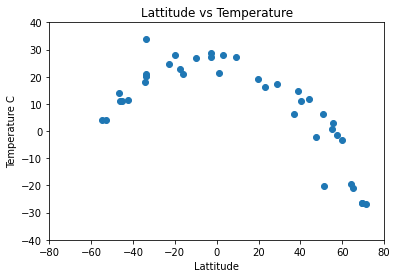

In [222]:
fig1 = plt.scatter(City_df['Lattitude'],City_df['Temperature C'])
plt.title('Lattitude vs Temperature')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Temperature C')
plt.ylim(-40,40)
plt.show()

(0.0, 105.0)

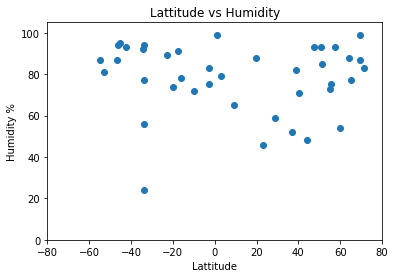

In [225]:
fig2 = plt.scatter(City_df['Lattitude'],City_df['Humidity %'])
plt.title('Lattitude vs Humidity')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Humidity %')
plt.ylim(0,105)
plt.show()

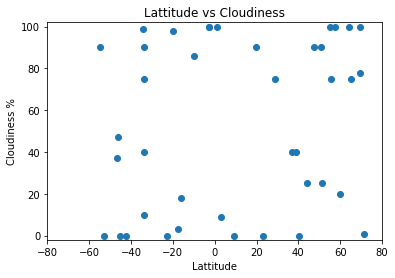

In [229]:
fig3 = plt.scatter(City_df['Lattitude'],City_df['Cloudiness %'])
plt.title('Lattitude vs Cloudiness')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Cloudiness %')
plt.ylim(-2,102)
plt.show()

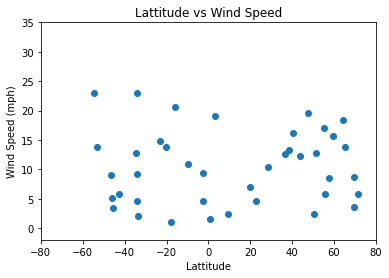

In [230]:
fig4 = plt.scatter(City_df['Lattitude'],City_df['Wind Speed (mph)'])
plt.title('Lattitude vs Wind Speed')
plt.xlabel('Lattitude')
plt.xlim(-80, 80)
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2,35)
plt.show()

In [193]:
# Hemispheric Analysis

NorthernHemisphere_df = City_df.loc[(City_df['Lattitude'] < 0)]
SouthernHemisphere_df = City_df.loc[(City_df['Lattitude'] > 0)]



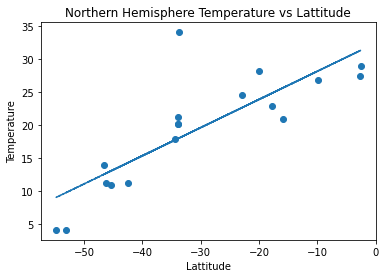

In [194]:
graph1 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Temperature C'])
plt.xlabel('Lattitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere Temperature vs Lattitude')
g1_slope, g1_int, g1_r, g1_p, g1_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Temperature C'])
g1_fit = g1_slope * NorthernHemisphere_df['Lattitude'] + g1_int
plt.plot(NorthernHemisphere_df['Lattitude'],g1_fit,"--")

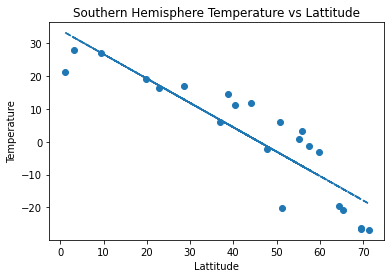

In [195]:
graph2 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Temperature C'])
plt.xlabel('Lattitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere Temperature vs Lattitude')
g2_slope, g2_int, g2_r, g2_p, g2_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Temperature C'])
g2_fit = g2_slope * SouthernHemisphere_df['Lattitude'] + g2_int
plt.plot(SouthernHemisphere_df['Lattitude'],g2_fit,"--")

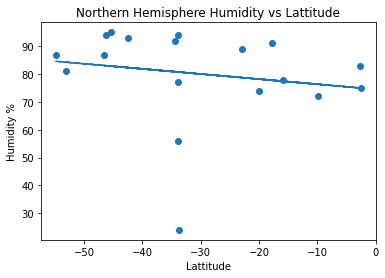

In [196]:
graph3 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Humidity %'])
plt.xlabel('Lattitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere Humidity vs Lattitude')
g3_slope, g3_int, g3_r, g3_p, g3_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Humidity %'])
g3_fit = g3_slope * NorthernHemisphere_df['Lattitude'] + g3_int
plt.plot(NorthernHemisphere_df['Lattitude'],g3_fit,"--")

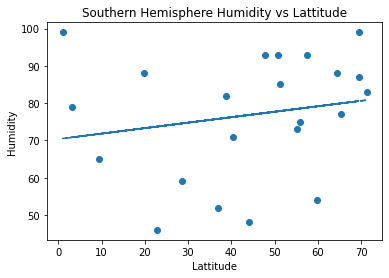

In [197]:
graph4 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Humidity %'])
plt.xlabel('Lattitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere Humidity vs Lattitude')
g4_slope, g4_int, g4_r, g4_p, g4_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Humidity %'])
g4_fit = g4_slope * SouthernHemisphere_df['Lattitude'] + g4_int
plt.plot(SouthernHemisphere_df['Lattitude'],g4_fit,"--")
plt.show()

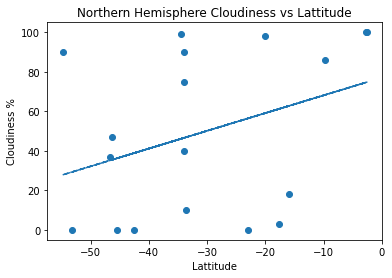

In [198]:
graph5 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Cloudiness %'])
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere Cloudiness vs Lattitude')
g5_slope, g5_int, g5_r, g5_p, g5_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Cloudiness %'])
g5_fit = g5_slope * NorthernHemisphere_df['Lattitude'] + g5_int
plt.plot(NorthernHemisphere_df['Lattitude'],g5_fit,"--")

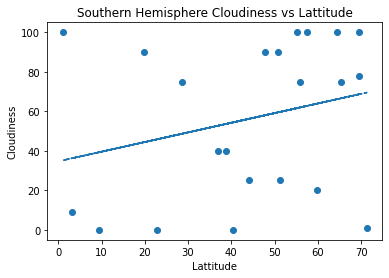

In [199]:
graph6 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Cloudiness %'])
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness %')
plt.title('Southern Hemisphere Cloudiness vs Lattitude')
g6_slope, g6_int, g6_r, g6_p, g6_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Cloudiness %'])
g6_fit = g6_slope * SouthernHemisphere_df['Lattitude'] + g6_int
plt.plot(SouthernHemisphere_df['Lattitude'],g6_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Cloudiness vs Lattitude.jpg', dpi = 300)

plt.show()

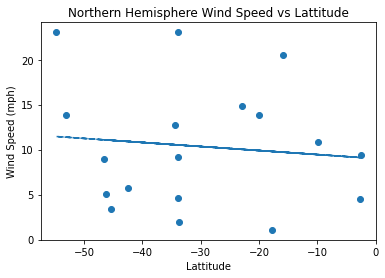

In [200]:
graph7 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Wind Speed (mph)'])
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed vs Lattitude')
g7_slope, g7_int, g7_r, g7_p, g7_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Wind Speed (mph)'])
g7_fit = g7_slope * NorthernHemisphere_df['Lattitude'] + g7_int
plt.plot(NorthernHemisphere_df['Lattitude'],g7_fit,"--")

plt.savefig(savefolder + 'Northern Hemisphere Wind Speed vs Lattitude.jpg', dpi = 300)

plt.show()

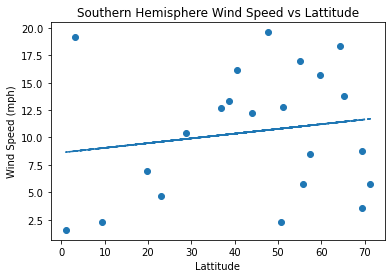

In [236]:
graph8 = plt.scatter(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Wind Speed (mph)'])
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed vs Lattitude')
g8_slope, g8_int, g8_r, g8_p, g8_std_err = stats.linregress(SouthernHemisphere_df['Lattitude'],SouthernHemisphere_df['Wind Speed (mph)'])
g8_fit = g8_slope * SouthernHemisphere_df['Lattitude'] + g8_int
plt.plot(SouthernHemisphere_df['Lattitude'],g8_fit,"--")

plt.savefig(savefolder + 'Southern Hemisphere Wind Speed vs Lattitude.jpg', dpi = 300)

plt.show()